# Table of Contents
 <p><div class="lev1 toc-item"><a href="#DATA:" data-toc-modified-id="DATA:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>DATA:</a></div><div class="lev1 toc-item"><a href="#exploration" data-toc-modified-id="exploration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>exploration</a></div><div class="lev2 toc-item"><a href="#plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)" data-toc-modified-id="plot-mass-shooting-vs-gdp-in-absolute-numbers,-and-per-person.-Show-the-errorbars-(y-errors)-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-civilian-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-civilian-fire-arms-per-person-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>plot the average number of civilian fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-average-number-of-homicide-by-fire-arms-per-person" data-toc-modified-id="plot-the-average-number-of-homicide-by-fire-arms-per-person-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>plot the average number of homicide by fire arms per person</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--homicides-by-fire-arm-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-24"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev2 toc-item"><a href="#plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color" data-toc-modified-id="plot-the-number-of--mass-shootings-against-the-number-of-civilian-firearms.-plot-the--US-in-a-different-color-25"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color</a></div><div class="lev1 toc-item"><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></div><div class="lev2 toc-item"><a href="#fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person." data-toc-modified-id="fit-a-line-to-the-Number-of-mass-shootings--per-person-as-a-function-of-Average-total-all-civilian-firearms-per-person.-31"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person.</a></div><div class="lev2 toc-item"><a href="#Outlier-removal:" data-toc-modified-id="Outlier-removal:-32"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Outlier removal:</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them" data-toc-modified-id="Extra-credit:-calculate-the-confidence-interval-by-hand-and-also-plot-them-33"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Extra credit: calculate the confidence interval by hand and also plot them</a></div><div class="lev2 toc-item"><a href="#Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot." data-toc-modified-id="Use-the-stsatsmodels.gaphics-package-to-plot-the-influence-plot.-34"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Use the stsatsmodels.gaphics package to plot the influence plot.</a></div><div class="lev2 toc-item"><a href="#Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences" data-toc-modified-id="Extra-credit:-calculate-from-scratch-the-stanrdardized-residuals-and-the-H-leverage-for-the-WLS-model-and-discuss-if-there-are-any-differences-35"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences</a></div><div class="lev2 toc-item"><a href="#Discuss-your-findings" data-toc-modified-id="Discuss-your-findings-36"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Discuss your findings</a></div>

**regression exercise**

**written by Federica B Bianco CUSP 2017**

**for PUI lecture on models and linear regression**

**investigate linear relationships between fire arm possession, homicides by fire arms, and mass shootings for different countries, considering also the country GDP**

# DATA: 

The Guardian firearms murders and ownership data. The relevans sheet is uploaded in the github repository as a csv file. Download it from there. Note: this dataset is from 2012.

**Extra credit**: download directly from google docs with a google API

https://docs.google.com/spreadsheets/d/1chqUZHuY6cXYrRYkuE0uwXisGaYvr7durZHJhpLGycs/edit#gid=0

Number of mass shootings: find the link here https://datawrapper.dwcdn.net/pvLFI/4/

The world population by country find the download link here :
https://data.worldbank.org/indicator/SP.POP.TOTL

Remember that all read or downloads have to me reproducible.

Merge all datasets. After throwing away the irrelevant data it should look something like this (I renamed the GDP and the population as gdp" and "pop")

Throughout, when I ask you to include errors in plots or models, use Poisson statistics: the error is the square root of the number you are considering (e.g. this country has N fire arms +/- square root of N, or this country has Np [= N/population +/- (square root of N) / population] fire arms per person).

In [321]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
%matplotlib inline

In [285]:
df_ = pd.read_csv(os.getenv('PUIDATA') + '/' + 'World firearms murders and ownership - Sheet 1.csv')

In [286]:
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms
0,Albania,AL,CTS,65.9,56.0,1.76,70.0,8.6,270000.0
1,Algeria,DZ,CTS,4.8,20.0,0.06,78.0,7.6,1900000.0
2,Angola,AO,NaN,NaN,NaN,NaN,34.0,17.3,2800000.0
3,Anguilla,AI,WHO-MDB,24.0,1.0,7.14,NaN,NaN,NaN
4,Argentina,AR,Ministry of Justice,52.0,1198.0,3.02,62.0,10.2,3950000.0


In [287]:
ms = pd.read_csv('data-pvLFI.csv')
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013)
0,Australia,15.0,4
1,Austria,30.4,1
2,Belgium,17.2,2
3,Canada,30.8,4
4,Denmark,12.0,0


In [288]:
pop = pd.read_csv('API_SP.POP.TOTL_DS2_en_csv_v2_10203548.csv', skiprows=4)
pop = pop[['Country Name', '2012']]
pop.rename(columns={'2012':'Population'}, inplace=True)
pop.head()

,Country Name,Population
0,Aruba,102577.0
1,Afghanistan,30696958.0
2,Angola,25096150.0
3,Albania,2900401.0
4,Andorra,82431.0


In [289]:
ms = ms.merge(pop, left_on='Country', right_on='Country Name')
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,Population
0,Australia,15.0,4,Australia,22742475.0
1,Austria,30.4,1,Austria,8429991.0
2,Belgium,17.2,2,Belgium,11128246.0
3,Canada,30.8,4,Canada,34750545.0
4,Denmark,12.0,0,Denmark,5591572.0


In [290]:
gdp = pd.read_csv('API_NY.GDP.MKTP.CD_DS2_en_csv_v2_10203569.csv', skiprows=4)
gdp = gdp[['Country Name', '2012']]
gdp.rename(columns={'2012':'gdp'}, inplace=True)
gdp.head()

,Country Name,gdp
0,Aruba,NaN
1,Afghanistan,2.053654e+10
2,Angola,1.139232e+11
3,Albania,1.231978e+10
4,Andorra,3.164615e+09


In [291]:
ms = ms.merge(gdp, on='Country Name')
ms.head()

,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,Population,gdp
0,Australia,15.0,4,Australia,22742475.0,1.543411e+12
1,Austria,30.4,1,Austria,8429991.0,4.094252e+11
2,Belgium,17.2,2,Belgium,11128246.0,4.978842e+11
3,Canada,30.8,4,Canada,34750545.0,1.824289e+12
4,Denmark,12.0,0,Denmark,5591572.0,3.271489e+11


In [292]:
df_ = df_.merge(ms, right_on="Country Name", left_on="Country/Territory")
df_.head()

,Country/Territory,ISO code,Source,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Country,Guns per 100 inhabitants,Number of mass shootings (1983-2013),Country Name,Population,gdp
0,Australia,AU,NSO,11.5,30.0,0.14,42.0,15.0,3050000.0,Australia,15.0,4,Australia,22742475.0,1.543411e+12
1,Austria,AT,CTS,29.5,18.0,0.22,14.0,30.4,2500000.0,Austria,30.4,1,Austria,8429991.0,4.094252e+11
2,Belgium,BE,WHO-MDB,39.5,70.0,0.68,34.0,17.2,1800000.0,Belgium,17.2,2,Belgium,11128246.0,4.978842e+11
3,Canada,CA,CTS,32.0,173.0,0.51,13.0,30.8,9950000.0,Canada,30.8,4,Canada,34750545.0,1.824289e+12
4,Denmark,DK,CTS,31.9,15.0,0.27,54.0,12.0,650000.0,Denmark,12.0,0,Denmark,5591572.0,3.271489e+11


In [293]:
df_.drop(columns={'ISO code', 'Source', 'Country', 'Country Name'}, inplace=True)
df_.rename(columns={'Number of mass shootings (1983-2013)': 'Number of mass shootings'}, inplace=True)
df_.head()

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,Population,gdp
0,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,22742475.0,1.543411e+12
1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,8429991.0,4.094252e+11
2,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0,17.2,2,11128246.0,4.978842e+11
3,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,34750545.0,1.824289e+12
4,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,5591572.0,3.271489e+11


# exploration

## plot mass shooting vs gdp in absolute numbers, and per person. Show the errorbars (y errors)

Use Poisson statistics for the errorbars on the number of mass shootings (optional: include errors on the population, also as Poisson statistics)

Are there any points that look like they may be outilers?


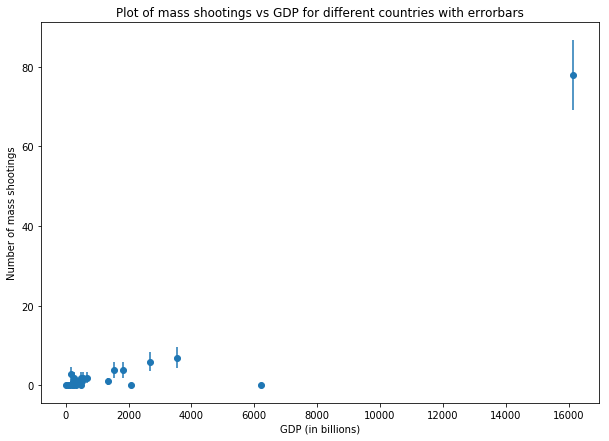

Number of mass shooting vs GDP, errors represent Poisson statistics.
The datapoint to the top right of the plot is the USA, which has both the highest GDP and the highest number of mass shootings


In [294]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_.gdp / 1e9, df_['Number of mass shootings'])
ax.errorbar(df_.gdp / 1e9, df_['Number of mass shootings'], 
            yerr = np.sqrt(df_['Number of mass shootings'] * 1.0), fmt = '.')
ax.set_xlabel("GDP (in billions)")
ax.set_ylabel("Number of mass shootings")
ax.set_ylim()
ax.set_title('Plot of mass shootings vs GDP for different countries with errorbars')
plt.show()
print ("Number of mass shooting vs GDP, " + 
       "errors represent Poisson statistics.\n" + 
       "The datapoint to the top right of the plot is the USA, " + 
       "which has both the highest GDP and the highest number of mass shootings")


## plot the average number of civilian fire arms per person
first without errors, then with errors. are there  points that look like outliers?

In [295]:
df_['firearmsPP'] = df_['Average total all civilian firearms']/df_['Population']
df_.head()

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,Population,gdp,firearmsPP
0,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.134110
1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,8429991.0,4.094252e+11,0.296560
2,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0,17.2,2,11128246.0,4.978842e+11,0.161751
3,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,34750545.0,1.824289e+12,0.286326
4,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.116246


In [297]:
df_['shootingsPP'] = df_["Number of mass shootings"] / df_['Population'] * 1e3
df_.head()

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,Population,gdp,firearmsPP,shootingsPP
0,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.134110,0.000176
1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,8429991.0,4.094252e+11,0.296560,0.000119
2,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0,17.2,2,11128246.0,4.978842e+11,0.161751,0.000180
3,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,34750545.0,1.824289e+12,0.286326,0.000115
4,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.116246,0.000000


In [299]:
data = df_[(df_['Country/Territory'] == 'United States')]
data

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,Population,gdp,firearmsPP,shootingsPP
22,United States,60.0,9146.0,2.97,1.0,88.8,270000000.0,88.8,78,313993272.0,1.615526e+13,0.859891,0.000248


(-0.0001, 0.001)

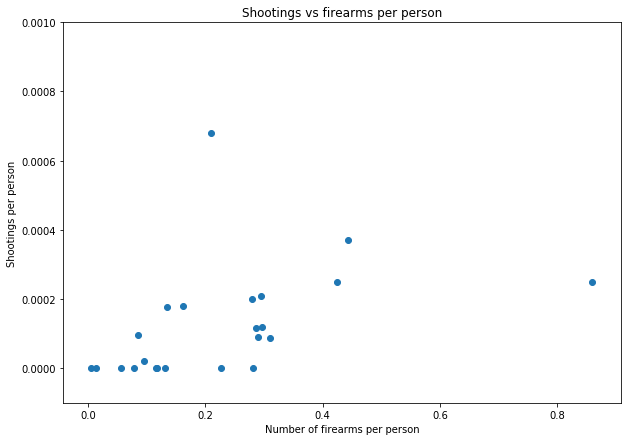

In [170]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmsPP'], df_['shootingsPP'])
plt.ylabel('Shootings per person')
plt.xlabel('Number of firearms per person')
plt.title('Shootings vs firearms per person')
ax.set_ylim(-.0001, 0.001)

United States stands again as an outlier with the highest firearms per person of 0.8. Though the number of mass shootings is highest in US, shootings per person is not the highest because of its relatively high population among other countries

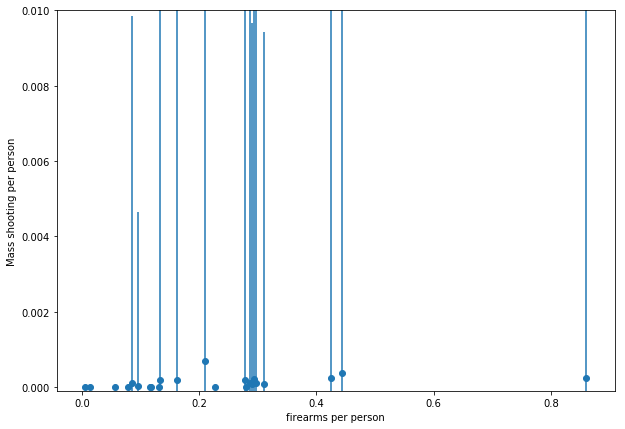

In [301]:
fig = plt.figure(figsize=(10,7)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(df_['firearmsPP'], df_['shootingsPP'])
ax.errorbar(df_['firearmsPP'], df_['shootingsPP'], 
            yerr = np.sqrt(df_['shootingsPP'] * 1.0), fmt = '.')
ax.set_xlabel("firearms per person")
ax.set_ylabel("Mass shooting per person")
ax.set_ylim(-0.0001, 0.01)
plt.show()

Error bars of the shootings per person

## plot the average number of homicide by fire arms per person
first as a histogram

then against the country GDP, with statistical errors. are there  points that look like outliers?

Text(0,0.5,'frequency')

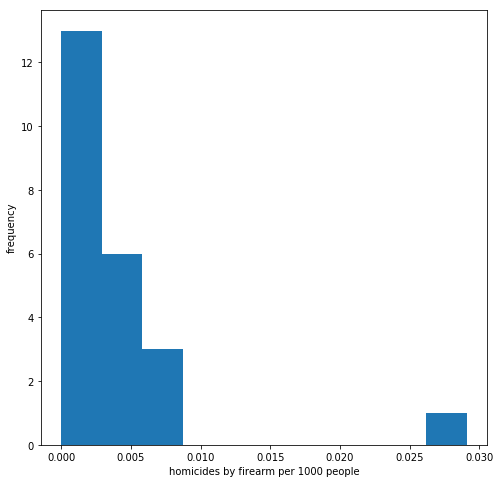

In [162]:
plt.figure(figsize=(8,8))
plt.hist(df_['Number of homicides by firearm'] / df_['Population'] * 1000)
plt.xlabel('homicides by firearm per 1000 people')
plt.ylabel('frequency')

While the highest count of homicides in countries lie in the range 0.000-0.005, United States has the highest number of homicides of aroung 0.027 per 1000 people which matches no other country.



## plot the number of  homicides by fire arm against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0,0.5,'Number of homicides by firearms')

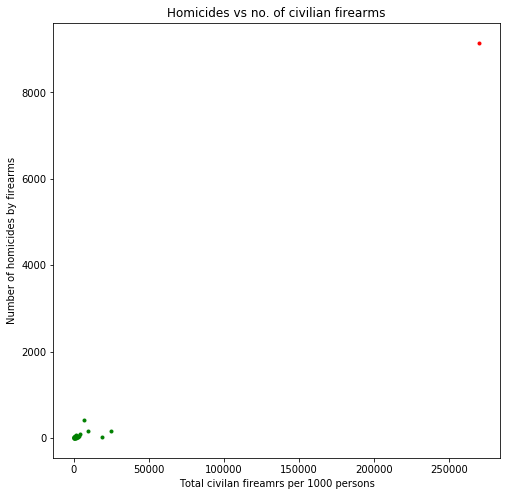

In [175]:
plt.figure(figsize=(8,8))
plt.plot(df_[df_['Average total all civilian firearms']/1000<50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of homicides by firearm']<2000]['Number of homicides by firearm']
         , '.', color="green")
plt.plot(df_[df_['Average total all civilian firearms']/1000>50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of homicides by firearm']>2000]['Number of homicides by firearm']
         , '.', color="red")
plt.title('Homicides vs no. of civilian firearms')
plt.xlabel('Total civilan fireamrs per 1000 persons')
plt.ylabel('Number of homicides by firearms')

US stands way far as an outlier here too with both the highest number of firearms and total homicides by firearms.

Text(0,0.5,'Number of homicides by firearms')

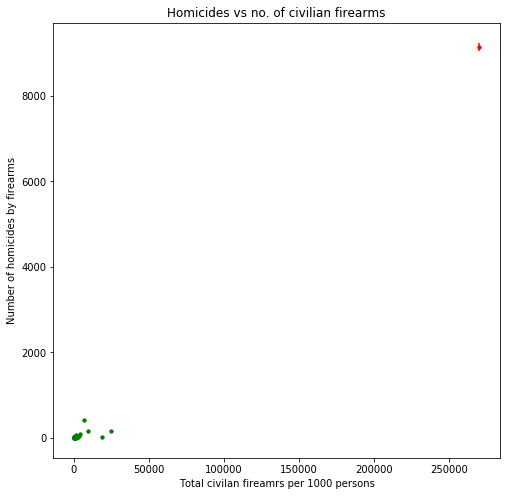

In [185]:
plt.figure(figsize=(8,8))
plt.plot(df_[df_['Average total all civilian firearms']/1000<50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of homicides by firearm']<2000]['Number of homicides by firearm']
         , '.', color="green")
plt.errorbar(df_[df_['Average total all civilian firearms']/1000<50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of homicides by firearm']<2000]['Number of homicides by firearm']
         , yerr=np.sqrt(df_[df_['Number of homicides by firearm']<2000]['Number of homicides by firearm'] * 1.0), fmt = '.', color='green')
plt.plot(df_[df_['Average total all civilian firearms']/1000>50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of homicides by firearm']>2000]['Number of homicides by firearm']
         , '.', color="red")
plt.errorbar(df_[df_['Average total all civilian firearms']/1000>50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of homicides by firearm']>2000]['Number of homicides by firearm']
         , yerr=np.sqrt(df_[df_['Number of homicides by firearm']>2000]['Number of homicides by firearm'] * 1.0), fmt = '.', color='red')
plt.title('Homicides vs no. of civilian firearms')
plt.xlabel('Total civilan fireamrs per 1000 persons')
plt.ylabel('Number of homicides by firearms')


The error bars here are not legible as their values are relatively low as compared to the homicides values

## plot the number of  mass shootings against the number of civilian firearms. plot the  US in a different color
with and without errorbars


Text(0,0.5,'Number of mass shootings')

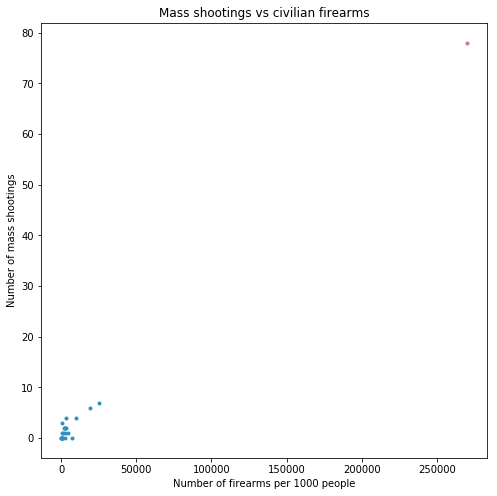

In [187]:
plt.figure(figsize=(8,8))
plt.plot(df_[df_['Average total all civilian firearms']/1000<50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of mass shootings']<20]['Number of mass shootings']
         , '.', color="#2e91be")
plt.plot(df_[df_['Average total all civilian firearms']/1000>50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of mass shootings']>20]['Number of mass shootings']
         , '.', color="#d46f9f")
plt.title('Mass shootings vs civilian firearms')
plt.xlabel('Number of firearms per 1000 people')
plt.ylabel('Number of mass shootings')

US stands way far as an outlier here too with both the highest number of firearms per 1000 people and total mass shootings.

Text(0,0.5,'Number of mass shootings')

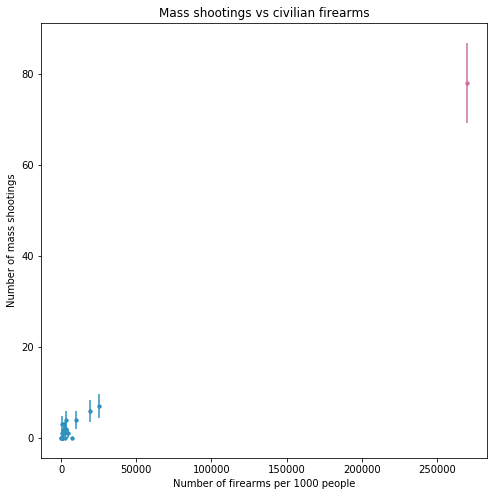

In [190]:
plt.figure(figsize=(8,8))
plt.plot(df_[df_['Average total all civilian firearms']/1000<50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of mass shootings']<20]['Number of mass shootings']
         , '.', color="#2e91be")
plt.errorbar(df_[df_['Average total all civilian firearms']/1000<50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of mass shootings']<20]['Number of mass shootings']
         , yerr=np.sqrt(df_[df_['Number of mass shootings']<20]['Number of mass shootings'] * 1.0), fmt = '.', color="#2e91be")
plt.plot(df_[df_['Average total all civilian firearms']/1000>50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of mass shootings']>20]['Number of mass shootings']
         , '.', color="#d46f9f")
plt.errorbar(df_[df_['Average total all civilian firearms']/1000>50000]['Average total all civilian firearms']/1000, 
         df_[df_['Number of mass shootings']>20]['Number of mass shootings']
         , yerr=np.sqrt(df_[df_['Number of mass shootings']>20]['Number of mass shootings'] * 1.0), fmt = '.', color="#d46f9f")
plt.title('Mass shootings vs civilian firearms')
plt.xlabel('Number of firearms per 1000 people')
plt.ylabel('Number of mass shootings')

# Modeling

## fit a line to the Number of mass shootings  per person as a function of Average total all civilian firearms per person. 
Before you do it it is a good idea to make sure that both quantities are roughly of the same order of magnitude (unity). (You can simply divide by the order of magnitude of the mean of the sample to obtain this). Use

    - statsmodels OLS
    - statsmodels WLS
    - seaborn
    - choose one of
        -- creating a function that calculates the residuals and minimizing that function
        -- analytical solution http://mathworld.wolfram.com/LeastSquaresFitting.html
        -- numpy.polyfit() - https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.polyfit.html
    

WLS: that is the weighted square fit. The statsmodel package WLS function allows you to take the uncertainties of each data point into account when you fit your model. It takes the parameter weights, which is the inverse of your errors:
weights = 1.0/df.yerror
Notice that 
    a - sqrt(0) = 0
    b - 1/0 = infinity
    c - you cannot have weight that are infinity in your fit. Please come up with a solution and justify it.


the latter three you can learn about in this example: https://github.com/fedhere/PUI2017_fb55/blob/master/Lab5_fb55/genderIncomeBias.ipynb
Since we did not discuss these, I will add some notes to the repo in the afternoon.

Use the seaborn python package built in regression function  to plot the regression confidence intervals. 

import seaborn  as sns
sns.regplot(x="x", y="y", data=df);




In [199]:
X = df_['Average total all civilian firearms']/df_['Population']
y = df_['Number of mass shootings']
err = np.sqrt(df_['Number of mass shootings'] * 1.0)

In [207]:
err

0     2.000000
1     1.000000
2     1.414214
3     2.000000
4     0.000100
5     1.414214
6     2.449490
7     2.645751
8     0.000100
9     0.000100
10    0.000100
11    0.000100
12    0.000100
13    0.000100
14    0.000100
15    1.732051
16    1.000000
17    0.000100
18    1.000000
19    1.000000
20    1.414214
21    1.414214
22    8.831761
Name: Number of mass shootings, dtype: float64

As many countries have 0 mass shootings, we would put the error terms for them as 0.0001 (low value) as for the weights to be calculated further, we would want them to be large number compared to other weights where the error terms is not 0.

In [307]:
err1 = err
err1[err1 == 0] = 0.0001
err

0     2.000000
1     1.000000
2     1.414214
3     2.000000
4     0.000100
5     1.414214
6     2.449490
7     2.645751
8     0.000100
9     0.000100
10    0.000100
11    0.000100
12    0.000100
13    0.000100
14    0.000100
15    1.732051
16    1.000000
17    0.000100
18    1.000000
19    1.000000
20    1.414214
21    1.414214
22    8.831761
Name: Number of mass shootings, dtype: float64

In [308]:
weights = 1/err

In [309]:
weights

0         0.500000
1         1.000000
2         0.707107
3         0.500000
4     10000.000000
5         0.707107
6         0.408248
7         0.377964
8     10000.000000
9     10000.000000
10    10000.000000
11    10000.000000
12    10000.000000
13    10000.000000
14    10000.000000
15        0.577350
16        1.000000
17    10000.000000
18        1.000000
19        1.000000
20        0.707107
21        0.707107
22        0.113228
Name: Number of mass shootings, dtype: float64

In [310]:
data2 = df_
data2.head()

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Average total all civilian firearms,Guns per 100 inhabitants,Number of mass shootings,Population,gdp,firearmsPP,shootingsPP
0,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.134110,0.000176
1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,8429991.0,4.094252e+11,0.296560,0.000119
2,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0,17.2,2,11128246.0,4.978842e+11,0.161751,0.000180
3,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,34750545.0,1.824289e+12,0.286326,0.000115
4,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.116246,0.000000


In [311]:
data2.rename(columns={'Average total all civilian firearms':'Avg_total_firearms', 'Number of mass shootings':'Mass_shootings'}, inplace=True)

In [312]:
data2.head()

,Country/Territory,% of homicides by firearm,Number of homicides by firearm,"Homicide by firearm rate per 100,000 pop",Rank by rate of ownership,Average firearms per 100 people,Avg_total_firearms,Guns per 100 inhabitants,Mass_shootings,Population,gdp,firearmsPP,shootingsPP
0,Australia,11.5,30.0,0.14,42.0,15.0,3050000.0,15.0,4,22742475.0,1.543411e+12,0.134110,0.000176
1,Austria,29.5,18.0,0.22,14.0,30.4,2500000.0,30.4,1,8429991.0,4.094252e+11,0.296560,0.000119
2,Belgium,39.5,70.0,0.68,34.0,17.2,1800000.0,17.2,2,11128246.0,4.978842e+11,0.161751,0.000180
3,Canada,32.0,173.0,0.51,13.0,30.8,9950000.0,30.8,4,34750545.0,1.824289e+12,0.286326,0.000115
4,Denmark,31.9,15.0,0.27,54.0,12.0,650000.0,12.0,0,5591572.0,3.271489e+11,0.116246,0.000000


In [313]:
model1 = smf.ols(formula='Mass_shootings ~ firearmsPP', data=data2).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Mass_shootings   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.596
Method:                 Least Squares   F-statistic:                     33.46
Date:                Tue, 13 Nov 2018   Prob (F-statistic):           9.65e-06
Time:                        19:04:53   Log-Likelihood:                -85.002
No. Observations:                  23   AIC:                             174.0
Df Residuals:                      21   BIC:                             176.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.4879      3.413     -3.073      0.006     -17.586      -3.389
firearmsPP    68.3332     11.813      5.785      0.000      43.767      92.900
==============================================================================
Omnibus:                        7.279   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                5.450
Skew:                           0.768   Prob(JB):                       0.0655
Kurtosis:                       4.824   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [314]:
intercept = [model1.params[0]]
slope = [model1.params[1]]
intercept, slope

([-10.48788197557103], [68.33324615804668])

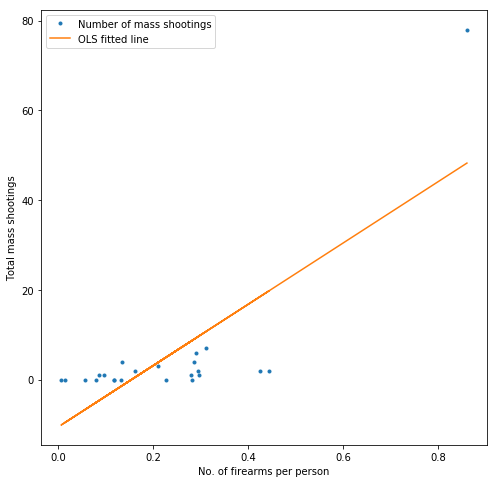

In [315]:
plt.figure(figsize=(8,8))
plt.plot(X, y, '.')
plt.xlabel('No. of firearms per person')
plt.ylabel('Total mass shootings')
plt.plot(X, X*slope + intercept, label='OLS fitted line')
plt.legend()

In [316]:
model2 = smf.wls(formula='Mass_shootings ~ firearmsPP', data=data2, weights=weights).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:         Mass_shootings   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.047
Method:                 Least Squares   F-statistic:                  0.003809
Date:                Tue, 13 Nov 2018   Prob (F-statistic):              0.951
Time:                        19:04:55   Log-Likelihood:                -35.075
No. Observations:                  23   AIC:                             74.15
Df Residuals:                      21   BIC:                             76.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0013      0.033     -0.039      0.969      -0.070       0.068
firearmsPP     0.0143      0.232      0.062      0.951      -0.468       0.496
==============================================================================
Omnibus:                       53.196   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.386
Skew:                           4.059   Prob(JB):                     2.65e-65
Kurtosis:                      18.633   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [317]:
intercept = [model2.params[0]]
slope = [model2.params[1]]
intercept, slope

([-0.0013058450752237842], [0.014305741159718223])

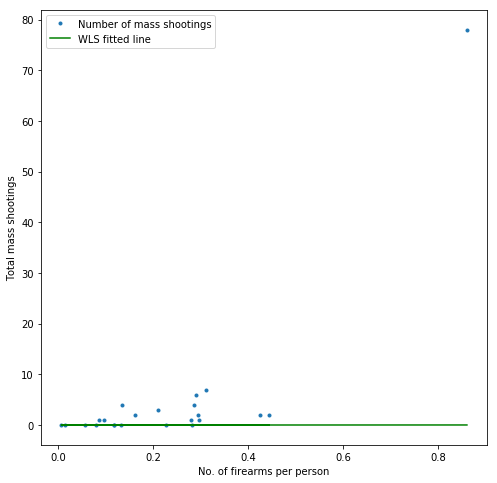

In [318]:
plt.figure(figsize=(8,8))
plt.plot(X, y, '.')
plt.plot(X, X*slope + intercept, color='green', label='WLS fitted line')
plt.xlabel('No. of firearms per person')
plt.ylabel('Total mass shootings')
plt.legend()

Text(0.5,1,'Seaborn linear regression fitted line  with confidence intervals')

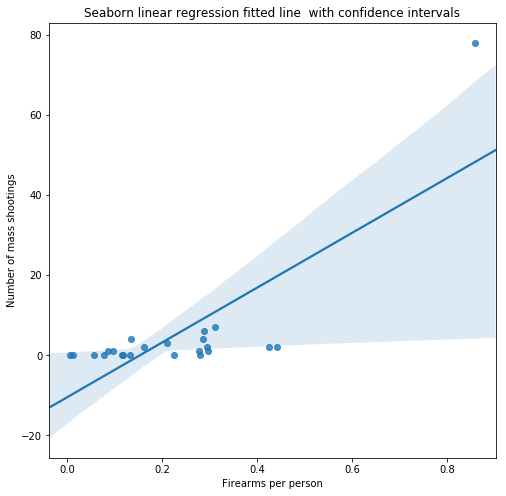

In [320]:
plt.figure(figsize=(8,8))
sns.regplot(X, y)
plt.xlabel('Firearms per person')
plt.title('Seaborn linear regression fitted line  with confidence intervals')

## Outlier removal:
The concept of outlier is actually rather sophisticated: a point can be an outlier in a context but not in another. If you want to remove outliers and try different fits, here is some info on how to remove data efficiently from a dataset 
    https://gist.github.com/fedhere/89db40a3c9a28335bf5a35d52a52c595

## Extra credit: calculate the confidence interval by hand and also plot them 
you can use pylab.fill_between(x, yfit - ci, yfit + ci, alpha=0.5)

**Confidence intervals: **
there are three type of intervals in a linear regression, plot any one of them all three if you want - how do they compare to the seaborn plot?:

1) Confidence intervals for the parameters slope and intercept

2) Confidence interval for the average y value

3) Prediction interval for a single y value

1) __confidence interval of the  model parameters slope and intercept:__
define sigma as the sum of the residuals over the square root of number n of observations. 

sigma: σ̂ =sqrt(Sum((Yoberved_i−Ypredicted_i)^2)/n)

where the sum is over all observations

Define t_alpha/2,n-2 the t statistics at (1-alpha/2) for a t distribution with n-2 degrees of freedom (you can calculate it with scipy
tp = sp.stats.t.ppf(0.975, n-2)



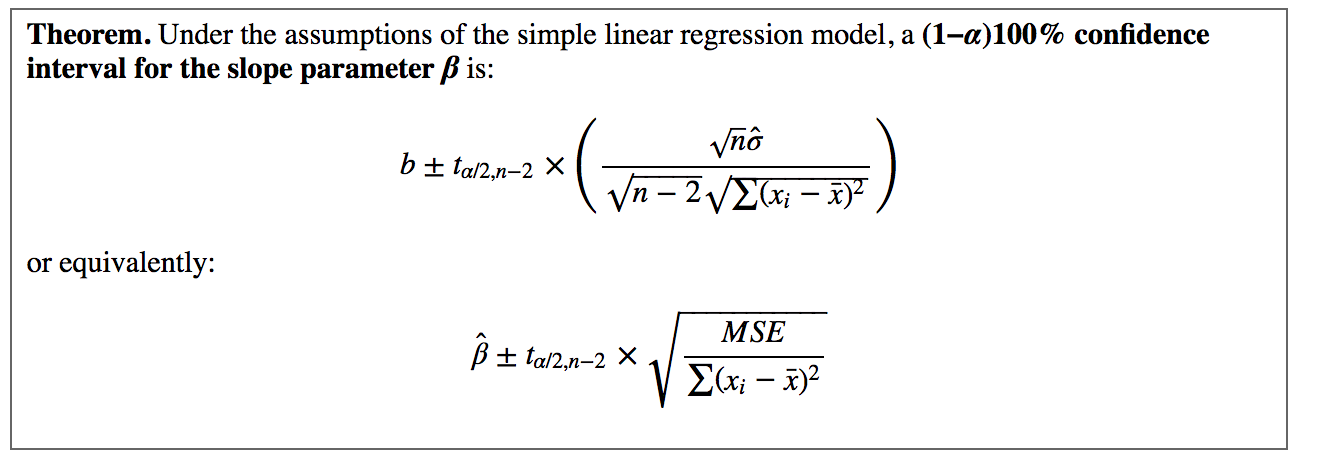

In [29]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression.png")

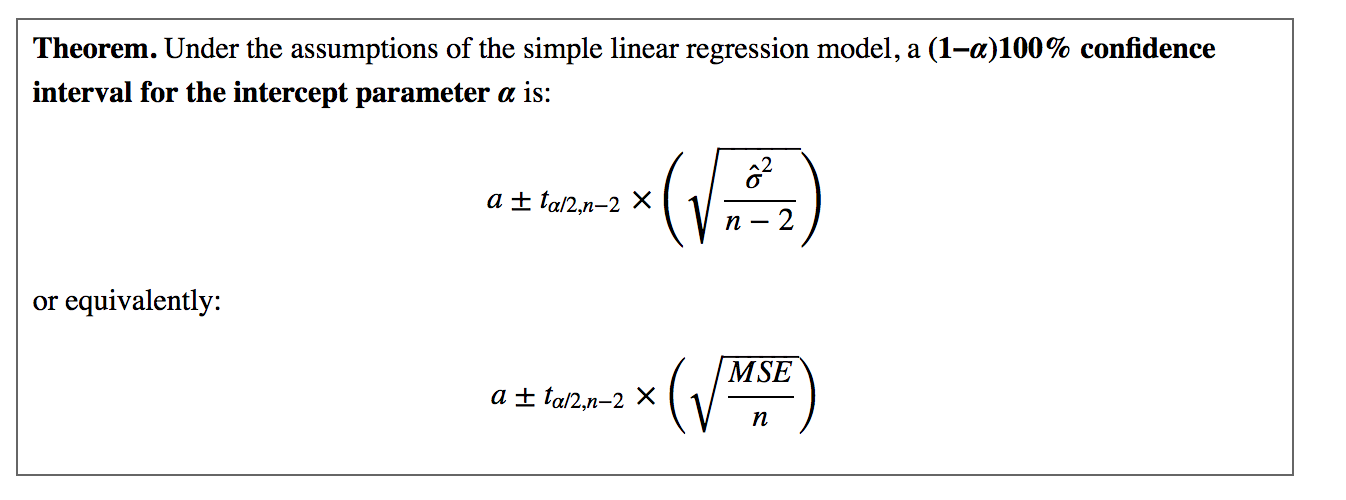

In [30]:
from IPython.display import Image
Image(filename="../Lab5_fb55/confidence_intervals_regression2.png")

[proof](https://onlinecourses.science.psu.edu/stat414/node/280)

2) **A confidence interval for E(y | x) , the expected (average) value of y for a given x_**

define s: residual standard error sy = sqrt(Sum((y_observed-y_predicted)^2)/(n-2))

(note: n-2 is the degrees of freedom of the problem: observations - number of parameters - 1)

the confidence interval for a given y(x*) is: 

y_predicted(x*) +/- t_(alpha/2)(n-2) * sy * sqrt( 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

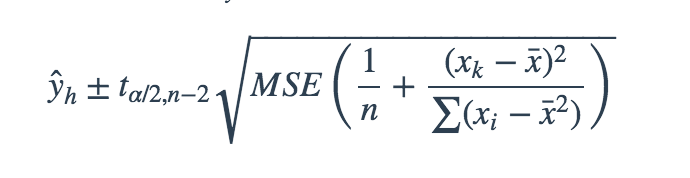

In [33]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciY.png")

3) **Confidence intervals for average y (predicted) values**

y_predicted(x*) +/- t_(n-2) * sy * sqrt( 1 + 1/n + (x* - mean(x)^2) / sum((x* - mean(x)^2)

very similar, but note the +1 in the square root

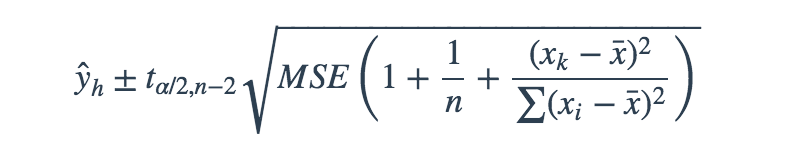

In [32]:
from IPython.display import Image
Image(filename="../Lab5_fb55/ciYaverage.png")

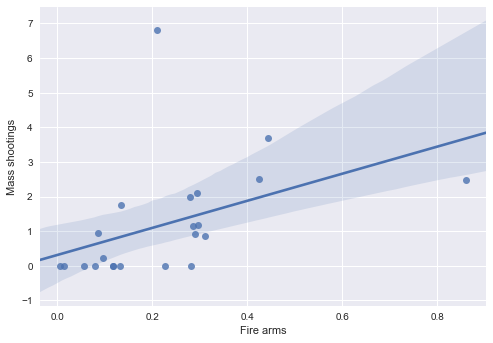

In [66]:
pl.figure()
import seaborn  as sns
sns.regplot(x="x", y="y", data=df_);

pl.ylabel("Mass shootings")
pl.xlabel("Fire arms");

## Use the stsatsmodels.gaphics package to plot the influence plot. 
Read the package documentation to learn how to read this plot and extract the countries with the highest influence

This is the topic of this week's assigned reading, so make sure you do the reading before you do this step. It will help you interpret the plot.

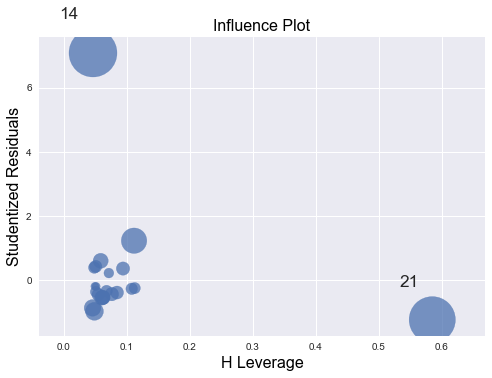

In [362]:
sm.graphics.influence_plot(modelOLS, alpha  = 0.05, criterion="cooks");

## Extra credit: calculate from scratch the stanrdardized residuals and the H leverage for the WLS model and discuss if there are any differences

## Discuss your findings